In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow import keras
from keras import regularizers
import sklearn.metrics as metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'



In [2]:
# read dataset

hours = list(map(str, range(24))) 
prices_columns = list(map(str, range(24))) + ['label']
prices = pd.read_csv('./TrainingData.txt', names = prices_columns)


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,label
0,3.881108,3.616019,3.601147,3.417457,2.723198,3.330895,3.723629,3.709737,5.848922,5.252491,...,6.215646,6.200070,5.842163,6.148899,5.333915,5.385360,4.851503,5.118068,5.113795,0
1,3.800883,3.210280,3.081142,3.498283,2.734601,3.105662,3.801500,3.796322,5.062057,4.987285,...,6.573781,5.749618,6.747027,6.537529,5.186155,5.420567,4.777363,5.120788,5.136329,0
2,3.964203,3.526702,3.255776,3.002896,2.812806,3.133526,3.635403,3.581440,5.607975,4.847624,...,6.162477,5.844224,6.073829,6.075009,5.572521,5.194047,4.771206,5.424286,5.628824,0
3,3.907543,3.201577,3.527606,2.861318,2.670537,3.311229,3.855523,3.877643,5.054537,4.982864,...,5.755873,5.531023,5.888425,6.627419,6.000076,5.059838,4.898310,5.887313,5.005183,0
4,4.051307,3.730421,3.192650,3.007943,2.954206,3.994215,3.670745,3.922720,5.561307,5.343242,...,5.712020,5.931136,6.635594,6.164542,5.439445,5.488501,4.781580,5.307637,5.480369,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,4.441229,4.115273,3.472402,2.745761,3.660351,4.093115,4.007465,4.291413,5.070075,5.110675,...,5.678653,5.965473,6.742951,6.404496,5.362002,5.981578,5.556540,5.991490,5.850924,1
9996,4.016708,3.746175,3.199771,3.178246,3.459837,3.968765,4.398305,4.565947,5.133747,5.116910,...,6.506161,5.920921,6.675199,6.688912,5.470335,6.004166,5.682725,5.648218,5.464242,1
9997,3.937626,3.803369,3.818526,3.293163,3.354351,3.720848,3.730639,4.349628,5.163885,4.562440,...,6.393017,5.727222,6.121406,6.107012,5.998606,6.053508,5.697338,5.854592,5.457969,1
9998,4.252633,3.560719,3.353298,3.695314,3.451712,3.377892,4.307202,4.082620,5.769166,5.403883,...,6.438657,6.272212,6.747316,6.907396,5.848778,5.813068,5.720781,5.539517,5.741377,1


In [3]:
# 80% as training data, 20% as testing data
train_x = prices.sample(frac=0.8, random_state=7)
train_y = train_x.pop('label')

test_x = prices.drop(train_x.index)
test_y = test_x.pop('label')


# data normalization

scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(train_x)
scaled_test = scaler.fit_transform(test_x)

In [4]:
# create model

model = tf.keras.Sequential()

In [5]:
# add layers


model.add(tf.keras.layers.Dense(64,activation='relu', kernel_regularizer=regularizers.l2(0.002), input_shape=(24,)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(32,activation='relu', kernel_regularizer=regularizers.l2(0.002)))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(32,activation='relu', kernel_regularizer=regularizers.l2(0.003)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(16,activation='relu', kernel_regularizer=regularizers.l2(0.004)))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1600      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 16)                5

In [6]:
# compile model

model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
# fitting

history = model.fit(scaled_train, train_y, batch_size = 256, epochs = 200, validation_split=0.25)

Epoch 1/200
24/24 [==============================] - 1s 9ms/step - loss: 1.0013 - accuracy: 0.5172 - val_loss: 0.9649 - val_accuracy: 0.6445
Epoch 2/200
24/24 [==============================] - 0s 3ms/step - loss: 0.9468 - accuracy: 0.5525 - val_loss: 0.9119 - val_accuracy: 0.6540
Epoch 3/200
24/24 [==============================] - 0s 3ms/step - loss: 0.9010 - accuracy: 0.5722 - val_loss: 0.8587 - val_accuracy: 0.6670
Epoch 4/200
24/24 [==============================] - 0s 3ms/step - loss: 0.8559 - accuracy: 0.6043 - val_loss: 0.7968 - val_accuracy: 0.7725
Epoch 5/200
24/24 [==============================] - 0s 3ms/step - loss: 0.8045 - accuracy: 0.6488 - val_loss: 0.7204 - val_accuracy: 0.7925
Epoch 6/200
24/24 [==============================] - 0s 3ms/step - loss: 0.7460 - accuracy: 0.6907 - val_loss: 0.6476 - val_accuracy: 0.8185
Epoch 7/200
24/24 [==============================] - 0s 3ms/step - loss: 0.6996 - accuracy: 0.7170 - val_loss: 0.5826 - val_accuracy: 0.8160
Epoch 8/200
2

In [8]:
# testing data

test_prediction = model.predict(scaled_test)

In [9]:
# mean_squared_error of testing data

print("MSE: ", metrics.mean_squared_error(test_y, test_prediction))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(test_y, test_prediction)))

MSE:  0.033080862717203334
RMSE:  0.18188145237270165


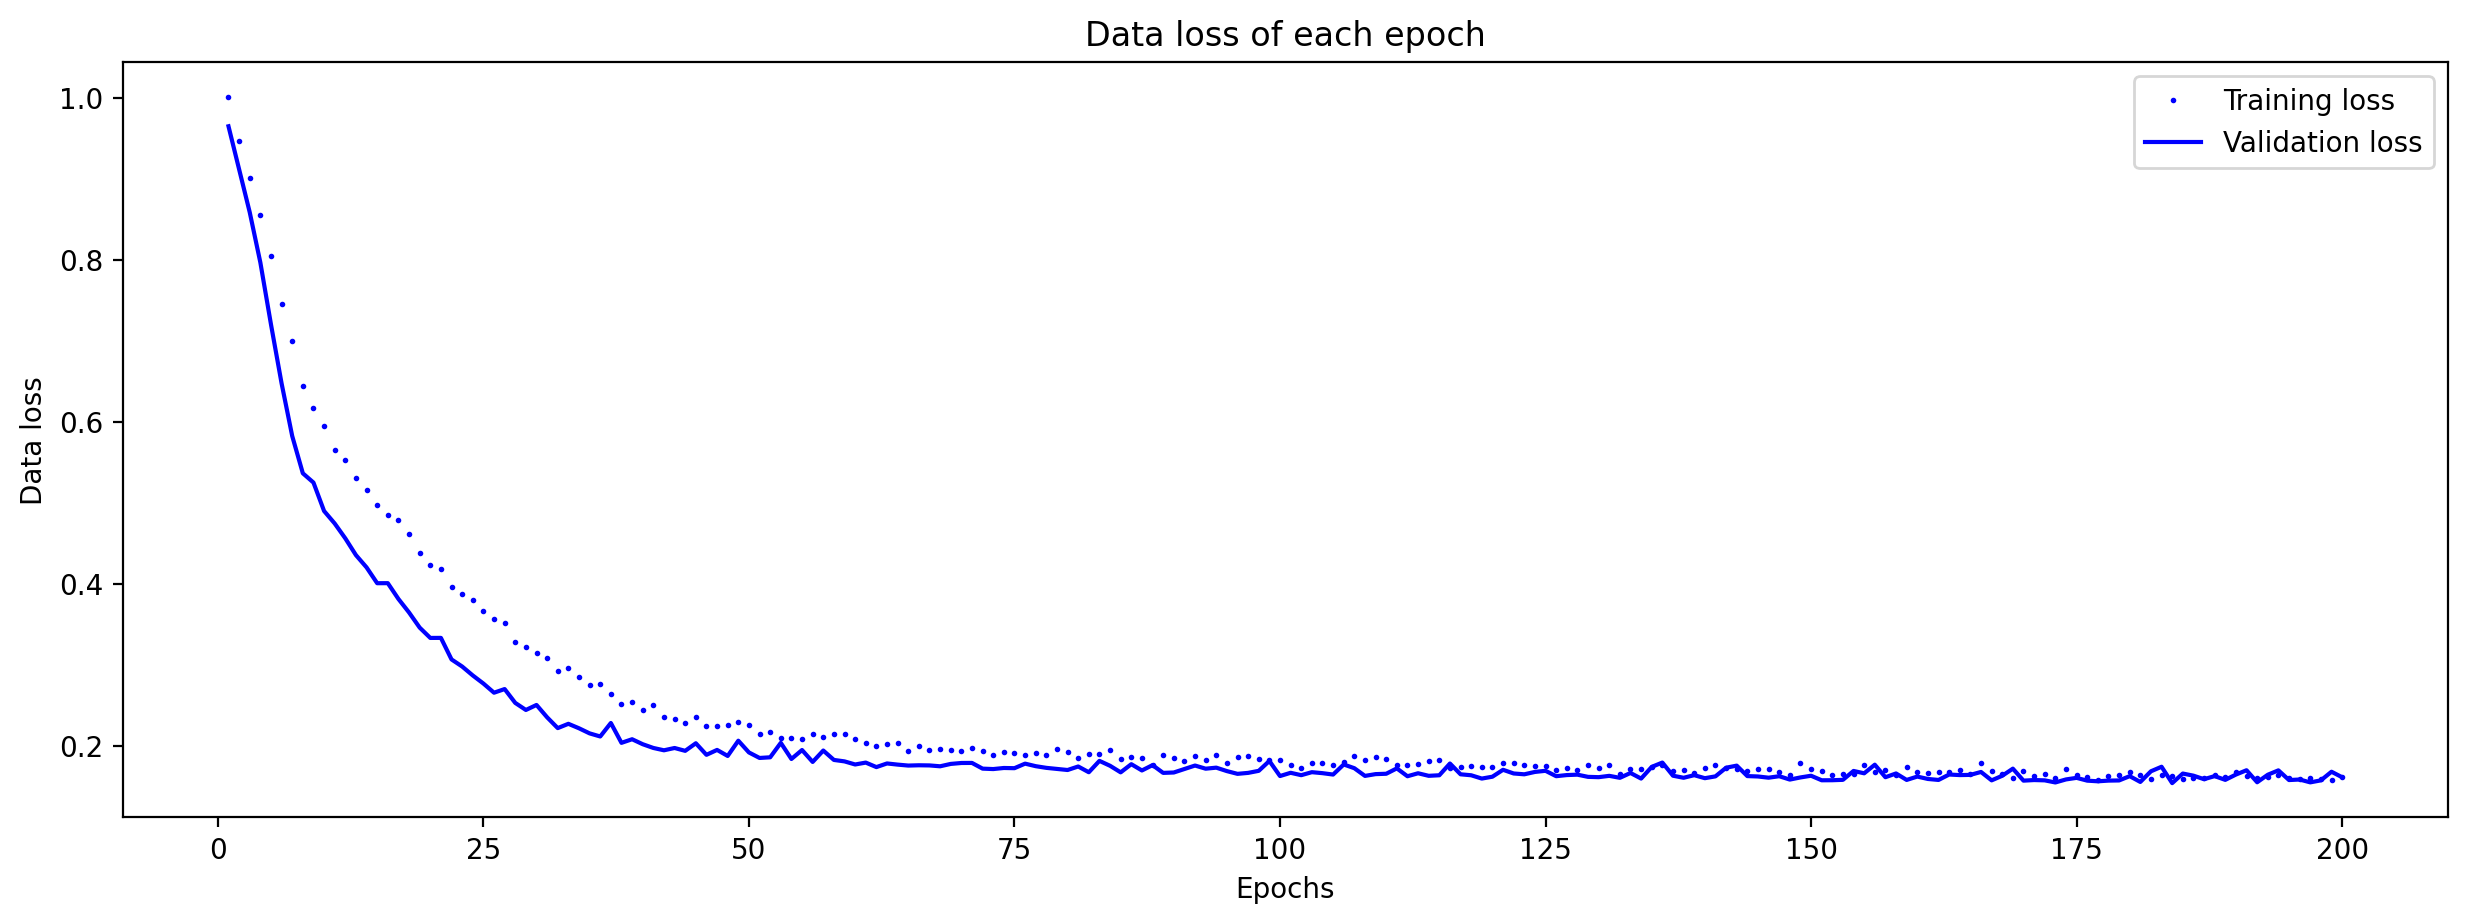

In [10]:
import matplotlib.pyplot as plt

history_dict = history.history
history_dict.keys()
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(loss_values)+1)
plt.figure(dpi = 200, figsize = (15,5))
plt.plot(epochs,loss_values,'bo', markersize=1,label='Training loss')
plt.plot(epochs,val_loss_values,'b',markersize=0.5,label='Validation loss')
plt.title('Data loss of each epoch')
plt.xlabel('Epochs')
plt.ylabel('Data loss')
plt.legend()


In [11]:
# read data that need to be calculated

test_prices = pd.read_csv('./TestingData.txt', names = hours)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,4.512853,3.436581,3.682556,3.062718,3.456278,4.028039,3.530470,4.292340,5.018994,4.783190,...,5.857223,6.381602,6.115519,6.294756,6.513145,5.250190,5.913805,5.123827,5.629438,5.753545
1,4.038201,3.874221,3.120743,3.261643,2.990717,3.789115,3.935849,4.391824,5.356575,5.274408,...,5.822269,6.206444,5.631747,6.631983,6.593441,5.643768,5.930986,5.421773,5.150519,5.126661
2,4.343619,3.254605,3.130290,3.583647,3.021889,3.953010,4.379102,4.432525,5.478115,4.914986,...,5.284374,6.252251,5.771876,6.023015,6.340118,5.398613,5.176215,5.193332,5.543661,5.148262
3,4.215916,3.310803,3.144808,2.826131,2.979042,3.264118,3.640009,4.332902,5.842453,4.560108,...,5.437254,6.420271,6.014269,6.447240,6.788652,5.721373,5.923394,4.989043,5.797218,5.723375
4,4.607662,3.688971,3.804653,2.882434,3.247362,3.393615,3.720861,3.600273,5.536350,4.653512,...,5.402382,5.784929,6.340968,6.649603,6.720808,5.392021,5.130296,5.532805,6.028962,5.496418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4.697937,3.988722,3.145694,3.090585,3.587754,3.267644,3.668620,4.405671,5.392661,4.741620,...,5.124373,6.436753,6.267063,5.981062,6.548897,5.853540,5.778480,4.908238,5.818340,5.910066
96,4.123134,3.682187,3.713447,3.454196,3.439953,3.668223,4.217498,3.974324,4.960387,4.619241,...,5.503357,6.463162,5.729175,5.869843,6.490337,5.421610,5.673165,4.866852,6.054392,5.380646
97,3.931524,3.144742,3.432318,3.643773,3.025754,3.744014,3.707630,3.936489,5.310619,5.328127,...,5.336696,5.671983,5.739869,6.399843,6.630000,5.334260,5.275984,5.535441,5.988638,5.858969
98,4.684524,4.123952,3.667197,2.961913,3.639619,3.801775,4.133400,3.976709,5.126293,4.925637,...,5.621768,6.560280,5.389332,6.663719,6.637633,6.042505,5.855303,4.884481,5.689829,5.919360


In [12]:
# data normalization

scaled_test = scaler.fit_transform(test_prices)

# predict and calculate label using model

test_prediction = (model.predict(scaled_test) > 0.5).astype("int8").flatten()

print(test_prediction)


[1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0
 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1
 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0]


In [15]:
# process results and output to 'TestingResults.txt'

test_prediction = pd.concat([test_prices, pd.Series(test_prediction, name='label')], axis=1)
test_prediction.to_csv(os.path.join('./', 'TestingResults.txt'),header=False, index=False)